In [1]:
#Project question 3: Within the top 10 countries, which renewables have been consumed the most?
#Source data was taken from the Annual BP Statistical Review of World Energy. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
source_df = pd.read_csv('bp-stats-review-2020-consolidated-dataset-panel-format.csv')
source_df.head()

,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,...,ren_power_mtoe,ren_power_twh,renewables_ej,renewables_mtoe,solar_ej,solar_mtoe,solar_twh,wind_ej,wind_mtoe,wind_twh
0,Algeria,1965,12.550880,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,1966,12.902626,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,1967,13.275020,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Algeria,1968,13.663581,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Algeria,1969,14.061724,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
source_df.columns

Index(['Country', 'Year', 'pop', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region',
       'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biodiesel_cons_kbd',
       'biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
       'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
       'biodiesel_prod_pj', 'biofuels_cons_ej', 'biofuels_cons_kbd',
       'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
       'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
       'biofuels_prod_ktoe', 'biofuels_prod_pj', 'biogeo_ej', 'biogeo_mtoe',
       'biogeo_twh', 'co2_mtco2', 'coalcons_ej', 'coalcons_mtoe',
       'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe', 'cobalt_kt', 'elect_twh',
       'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil',
       'ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe',
       'ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
       'ethanol_prod_ktoe', 'ethanol_prod_pj', 'gascons_bc

In [5]:
#First thing I need to do is understand what all these columns are. Know your data!
#What counts as a renewable? I think I should just go ahead and read the pdf report to get a sense of the data,
#because I don't really know that much about energy. 

In [6]:
#In the annual BP Stastical Report on World Energy, renewables include: wind, geothermal, solar, biomass and waste. 
#The unit of energy consumption that BP uses is the exojoule (EJ), so you should be looking for columns that end with
#this unit. 

In [7]:
#What counts as biomass? Biomass and biofuels are synonymous, and the most common biofuels used today are 
#ethanol and biodiesel. 

In [8]:
#I should filter the data frame using the following columns: solar_ej, wind_ej, biofuels_cons_ej, and biogeo_ej
filtered_df = source_df[['Country','Year','solar_ej','wind_ej','biofuels_cons_ej','biogeo_ej']]

In [9]:
filtered_df

,Country,Year,solar_ej,wind_ej,biofuels_cons_ej,biogeo_ej
0,Algeria,1965,0.0,0.0,0.0,0.0
1,Algeria,1966,0.0,0.0,0.0,0.0
2,Algeria,1967,0.0,0.0,0.0,0.0
3,Algeria,1968,0.0,0.0,0.0,0.0
4,Algeria,1969,0.0,0.0,0.0,0.0
5,Algeria,1970,0.0,0.0,0.0,0.0
6,Algeria,1971,0.0,0.0,0.0,0.0
7,Algeria,1972,0.0,0.0,0.0,0.0
8,Algeria,1973,0.0,0.0,0.0,0.0
9,Algeria,1974,0.0,0.0,0.0,0.0


In [10]:
#Next step is to filter this table to show only the top ten countries contributing to renewable electricity generation. 

In [11]:
top10 = ['US', 'Germany','China','Japan','Spain','Italy','Brazil','India','United Kingdom','Canada']
df_top10 = filtered_df[filtered_df.Country.isin(top10)]

In [12]:
#Lets verify that we have all the countries in our dataset.
df_top10.Country.unique()

array(['Brazil', 'Canada', 'China', 'Germany', 'India', 'Italy', 'Japan',
       'Spain', 'US', 'United Kingdom'], dtype=object)

In [13]:
#Whats the plan for this analysis? I want to make a pie graph breaking down renewable energy consumption for these ten
#countries. Which means 10 pie graphs. 

In [14]:
df_top10_summed = df_top10.groupby(['Country']).sum()

In [15]:
df_top10_summed

,Year,solar_ej,wind_ej,biofuels_cons_ej,biogeo_ej
Country,,,,,
Brazil,109560,0.089554,2.112635,14.891954,6.450300
Canada,109560,0.213729,2.110386,0.805229,2.750921
China,109560,5.966737,18.910843,1.216494,5.872662
Germany,109560,3.219125,9.506072,1.852443,6.167955
India,109560,1.203710,4.250292,0.049926,2.598475
Italy,109560,1.756345,1.640133,0.640656,4.254829
Japan,109560,3.101897,0.673371,0.150892,6.586864
Spain,109560,1.222102,6.446353,0.642413,0.920514
US,109560,4.086999,20.727482,18.743949,27.052977


In [16]:
df_top10_summed = df_top10_summed.drop(columns = 'Year')
df_top10_summed

,solar_ej,wind_ej,biofuels_cons_ej,biogeo_ej
Country,,,,
Brazil,0.089554,2.112635,14.891954,6.450300
Canada,0.213729,2.110386,0.805229,2.750921
China,5.966737,18.910843,1.216494,5.872662
Germany,3.219125,9.506072,1.852443,6.167955
India,1.203710,4.250292,0.049926,2.598475
Italy,1.756345,1.640133,0.640656,4.254829
Japan,3.101897,0.673371,0.150892,6.586864
Spain,1.222102,6.446353,0.642413,0.920514
US,4.086999,20.727482,18.743949,27.052977


In [17]:
df_top10_summed.columns

Index(['solar_ej', 'wind_ej', 'biofuels_cons_ej', 'biogeo_ej'], dtype='object')

In [18]:
#Need the labels to look a bit better than the column headers.
labels = ['Solar (ej)', 'Wind (ej)', 'Biofuels (ej)', 'Biomass and Geothermal (ej)']
explode = [.01, .01, .01, .01]

Text(0.5, 1.0, 'Renewable Energy Consumption in Brazil, 1965-2019')

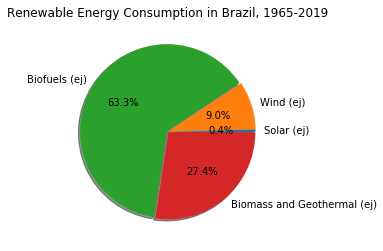

In [19]:
#Nice job! Now just make your pie graphs.
plt.pie(df_top10_summed.iloc[0], explode = explode, labels = labels , autopct = '%1.1f%%', shadow = True)
plt.title('Renewable Energy Consumption in Brazil, 1965-2019')



In [20]:
#Now I need to figure out how to do all 10 in one figure. 
ham = df_top10_summed.iloc[0].values
index_countries = df_top10_summed.index.values.tolist()


In [21]:
index_countries

['Brazil',
 'Canada',
 'China',
 'Germany',
 'India',
 'Italy',
 'Japan',
 'Spain',
 'US',
 'United Kingdom']

In [22]:
index_countries[0]

'Brazil'

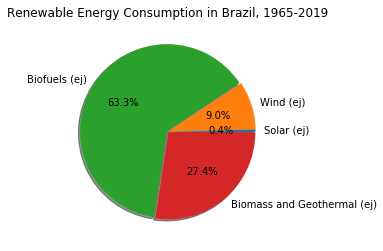

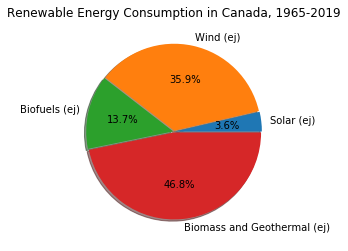

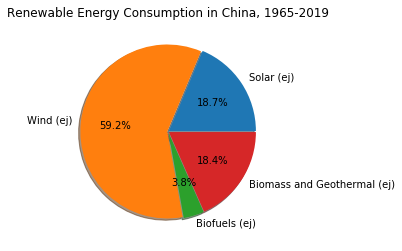

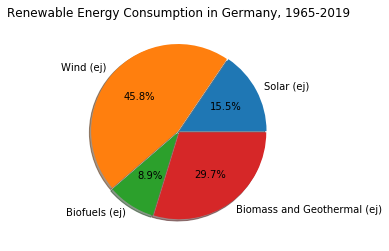

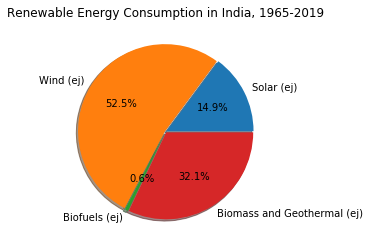

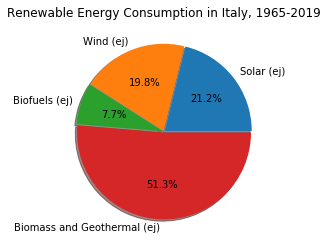

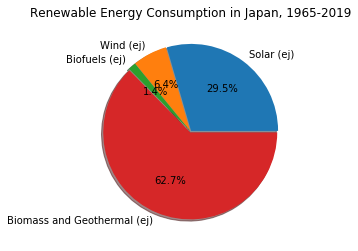

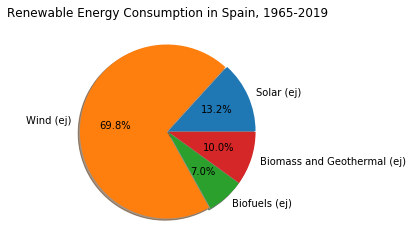

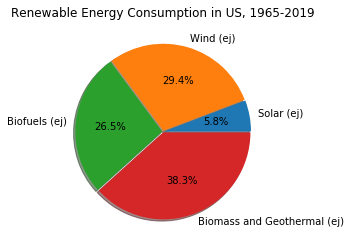

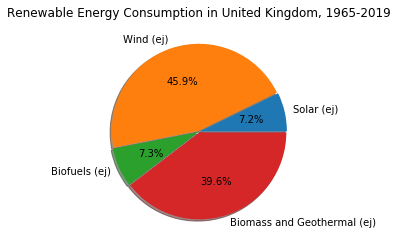

In [23]:
for i,j,k in zip(range(0,10), range(0,10), range(0,10)):
    plt.figure(i)
    plt.pie(df_top10_summed.iloc[j].values, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True)
    plt.title(f'Renewable Energy Consumption in {index_countries[k]}, 1965-2019')

In [24]:
df_top10_summed.head()

,solar_ej,wind_ej,biofuels_cons_ej,biogeo_ej
Country,,,,
Brazil,0.089554,2.112635,14.891954,6.450300
Canada,0.213729,2.110386,0.805229,2.750921
China,5.966737,18.910843,1.216494,5.872662
Germany,3.219125,9.506072,1.852443,6.167955
India,1.203710,4.250292,0.049926,2.598475


In [25]:
#Looks like it worked! You have successfully finished your first Data Science Portfolio Project (subject to criticism)!